# PCA plots  

#### R qqman vignette  

https://cran.r-project.org/web/packages/qqman/vignettes/qqman.html

#### Example of how to use `%%R` magics in Jupyter  

Other examples:  

https://dzone.com/articles/using-r-on-jupyternbspnotebook  

https://www.datacamp.com/community/blog/jupyter-notebook-r

https://anaconda.org/ijstokes/demonstrating-rpy2-and-rmagic/notebook 
https://rpy2.github.io/doc/latest/html/interactive.html 
https://gist.github.com/simecek/019d87c55fec3839d95bbf8489dde61d 

#### Imports & config

In [1]:
import rpy2

rpy2.__version__

'3.4.2'

In [2]:
import pandas as pd
import warnings; warnings.simplefilter('ignore')

%config InlineBackend.figure_format ='retina'
%load_ext rpy2.ipython

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
%R require(qqman)

R[write to console]: Loading required package: qqman

R[write to console]: 

R[write to console]: For example usage please run: vignette('qqman')

R[write to console]: 

R[write to console]: Citation appreciated but not required:

R[write to console]: Turner, (2018). qqman: an R package for visualizing GWAS results using Q-Q and manhattan plots. Journal of Open Source Software, 3(25), 731, https://doi.org/10.21105/joss.00731.

R[write to console]: 



<rpy2.robjects.vectors.BoolVector object at 0x7ffd0f21f380> [RTYPES.LGLSXP]
R classes: ('logical',)
[       1]

In [4]:
# %%R 
# vignette('qqman')

In [5]:
# %%R 
# library(qqman)
# vignette("manhattan")

In [6]:
%R head(gwasResults)

SNP  CHR  BP         P
1  rs1    1   1  0.914806
2  rs2    1   2  0.937075
3  rs3    1   3  0.286140
4  rs4    1   4  0.830448
5  rs5    1   5  0.641746
6  rs6    1   6  0.519096

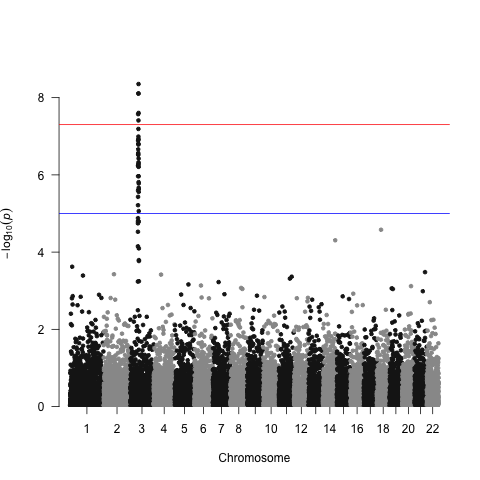

<rpy2.robjects.vectors.ListVector object at 0x7ffd0f256cc0> [RTYPES.VECSXP]
R classes: ('list',)
[BoolSexpVector]
  xpd: <class 'rpy2.rinterface.BoolSexpVector'>
  <rpy2.rinterface.BoolSexpVector object at 0x7ffd0f269980> [RTYPES.LGLSXP]

In [7]:
%R manhattan(gwasResults)

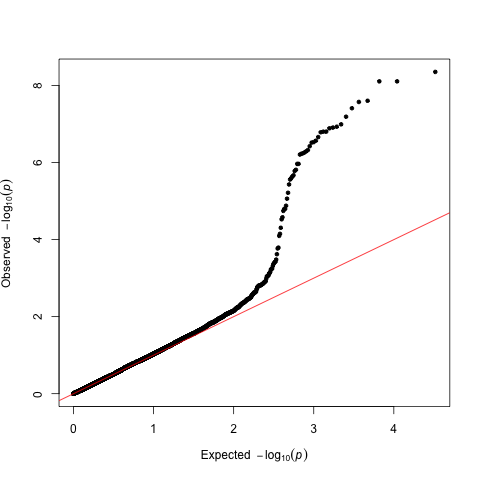

In [8]:
%R qq(gwasResults$P)

Specify Input & Output files

In [9]:
## input files
dir_gwas = '../data/gwas_plink'

plink_assoc = 'ieu-a-25.assoc'
plink_logistic = 'ieu-a-25.assoc.logistic'

## output dir
dir_plot = '../data/gwas_plink/plots_r_qqman'

In [10]:
import os

gwas_file_assoc = os.path.join(dir_gwas, plink_assoc)
plot_prefix_assoc = os.path.join(dir_plot, plink_assoc)

gwas_file_logistic = os.path.join(dir_gwas, plink_logistic)
plot_prefix_logistic = os.path.join(dir_plot, plink_logistic)


## create output directory (if needed)
!mkdir -p {dir_plot}

#### read in file --> pandas DF

In [11]:
df = pd.read_csv(gwas_file_assoc, header=0, delim_whitespace=True)

df.head()

CHR                      SNP         BP A1  F_A  F_U A2  CHISQ        P  \
0    1    1_120437718_rs2793823  120437718  A  0.0  0.0  G    0.0  0.00140   
1    1    1_120437884_rs2641348  120437884  G  0.0  0.0  A    0.0  0.00110   
2    1  1_120438577_rs147294252  120438577  A  0.0  0.0  G    0.0  0.25000   
3    1    1_120439109_rs6668119  120439109  C  0.0  0.0  G    0.0  0.00073   
4    1    1_120440029_rs2027447  120440029  C  0.0  0.0  T    0.0  0.00068   

         OR  
0  0.059212  
1  0.064851  
2  0.123986  
3  0.068593  
4  0.067659

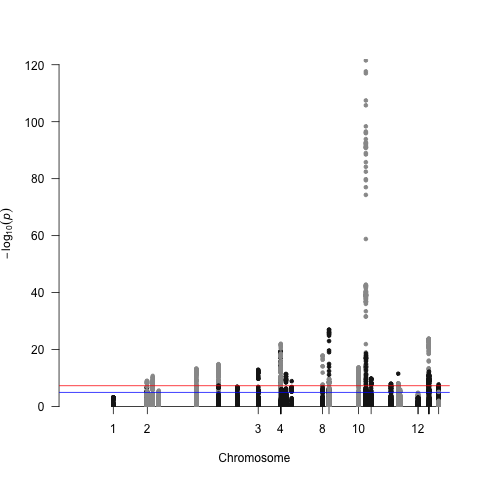

In [12]:
%%R -i df

manhattan(df)

In [13]:
%R head(gwasResults)

SNP  CHR  BP         P
1  rs1    1   1  0.914806
2  rs2    1   2  0.937075
3  rs3    1   3  0.286140
4  rs4    1   4  0.830448
5  rs5    1   5  0.641746
6  rs6    1   6  0.519096

In [14]:
df_plot = df[['SNP', 'CHR', 'BP', 'P']].copy()

df_plot.head()
df_plot.tail()

SNP  CHR         BP        P
0    1_120437718_rs2793823    1  120437718  0.00140
1    1_120437884_rs2641348    1  120437884  0.00110
2  1_120438577_rs147294252    1  120438577  0.25000
3    1_120439109_rs6668119    1  120439109  0.00073
4    1_120440029_rs2027447    1  120440029  0.00068

SNP  CHR        BP      P
42084    20_43057820_rs6031601   20  43057820  0.950
42085  20_43057831_rs112600410   20  43057831  0.039
42086   20_43058012_rs74173201   20  43058012  0.410
42087    20_43058018_rs3746574   20  43058018  0.750
42088    20_43058096_rs3746575   20  43058096  0.920

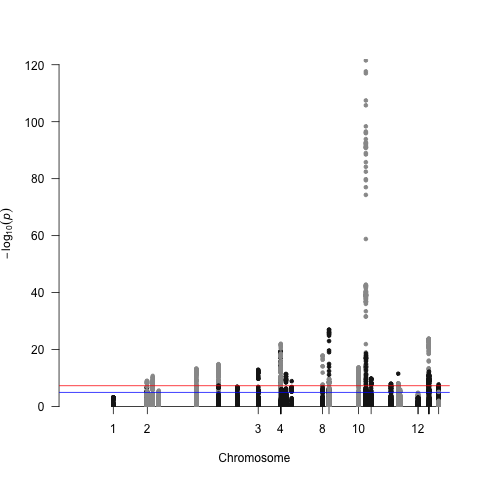

In [15]:
%%R -i df_plot 

manhattan(df_plot)

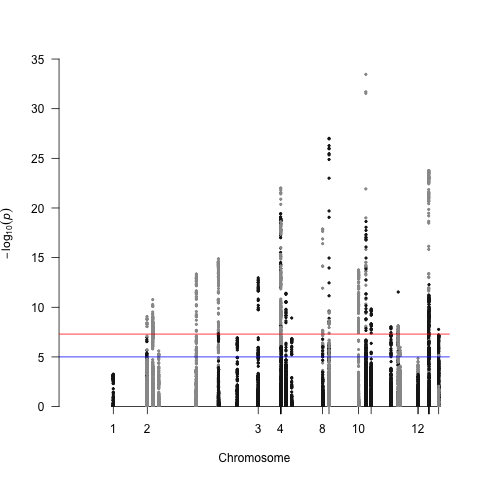

In [16]:
%%R -i df_plot 

manhattan(df_plot, cex=0.6, ylim=c(0,35), chrlabs = c(1:20))

<br>  

### manhattan plot looks strange - try to reformat SNP column to see if that helps?  



In [17]:
df2 = df_plot.copy()

df2[['_chr', '_pos', '_snp']] = df2['SNP'].str.split('_', expand=True)

df2.shape
df2.head()

(42089, 7)

SNP  CHR         BP        P _chr       _pos  \
0    1_120437718_rs2793823    1  120437718  0.00140    1  120437718   
1    1_120437884_rs2641348    1  120437884  0.00110    1  120437884   
2  1_120438577_rs147294252    1  120438577  0.25000    1  120438577   
3    1_120439109_rs6668119    1  120439109  0.00073    1  120439109   
4    1_120440029_rs2027447    1  120440029  0.00068    1  120440029   

          _snp  
0    rs2793823  
1    rs2641348  
2  rs147294252  
3    rs6668119  
4    rs2027447

In [18]:
df2.dtypes

SNP      object
CHR       int64
BP        int64
P       float64
_chr     object
_pos     object
_snp     object
dtype: object

In [19]:
df2['_snp'].nunique()
df2.shape

42059

(42089, 7)

In [20]:
_uniq_idx = (df2['_snp'].unique())

# _uniq_idx

len(_uniq_idx)

df2[~df2['_snp'].isin(_uniq_idx)]

42059

Empty DataFrame
Columns: [SNP, CHR, BP, P, _chr, _pos, _snp]
Index: []

In [21]:
df2['SNP'] = df2['_snp'].copy()

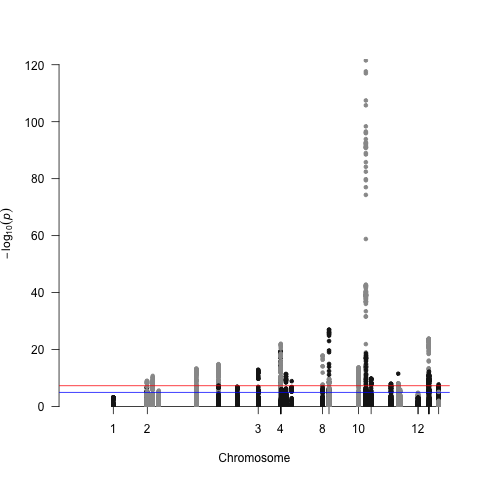

In [22]:
%%R -i df2 

manhattan(df2)

<br>  

### So the SNP column is not the cause...

In [23]:
df.dtypes

CHR        int64
SNP       object
BP         int64
A1        object
F_A      float64
F_U      float64
A2        object
CHISQ    float64
P        float64
OR       float64
dtype: object

In [24]:
df['CHR'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

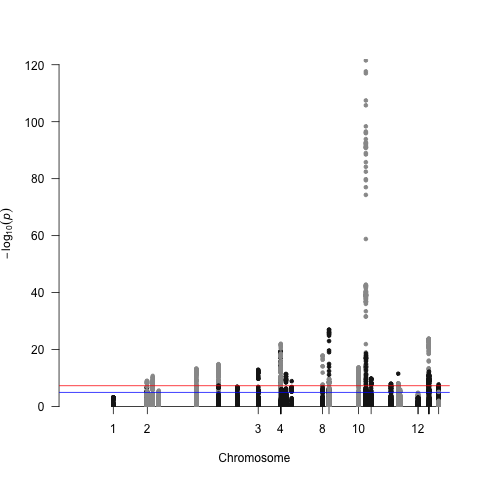

In [25]:
%%R -i df 

manhattan(df, chr='CHR')

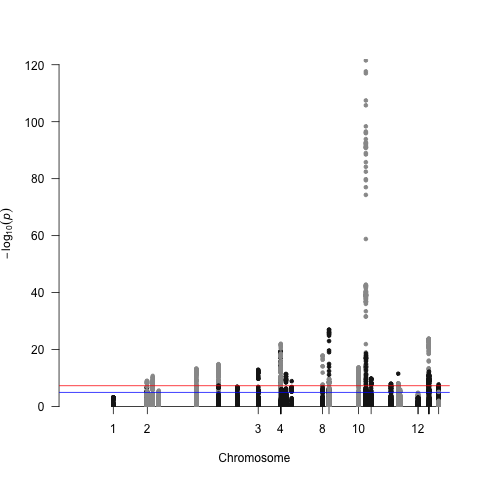

In [26]:
%%R -i df2 

manhattan(df2, chr='CHR', chrlabs = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))

<br>  

### Try plotting logistic result instead?

In [27]:
df_logistic = pd.read_csv(gwas_file_logistic, header=0, delim_whitespace=True)

df_logistic.head()

CHR                      SNP         BP A1 TEST    NMISS        OR  \
0    1    1_120437718_rs2793823  120437718  A  ADD  73902.3  0.059212   
1    1    1_120437884_rs2641348  120437884  G  ADD  73902.3  0.064851   
2    1  1_120438577_rs147294252  120438577  A  ADD  67530.5  0.123986   
3    1    1_120439109_rs6668119  120439109  C  ADD  73902.3  0.068593   
4    1    1_120440029_rs2027447  120440029  C  ADD  73902.3  0.067659   

         SE  STAT        P  
0  0.018513   0.0  0.00140  
1  0.020075   0.0  0.00110  
2  0.108496   0.0  0.25000  
3  0.020247   0.0  0.00073  
4  0.020018   0.0  0.00068

In [28]:
df_logistic.dtypes
df_logistic['CHR'].unique()

CHR        int64
SNP       object
BP         int64
A1        object
TEST      object
NMISS     object
OR       float64
SE       float64
STAT     float64
P        float64
dtype: object

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 15, 16, 17, 18, 19,
       20])

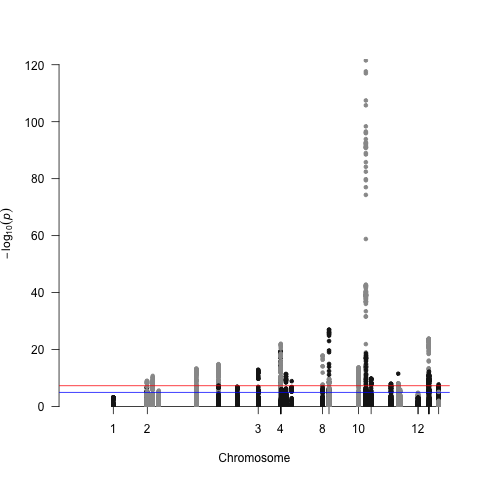

In [29]:
%%R -i df_logistic 

manhattan(df_logistic)

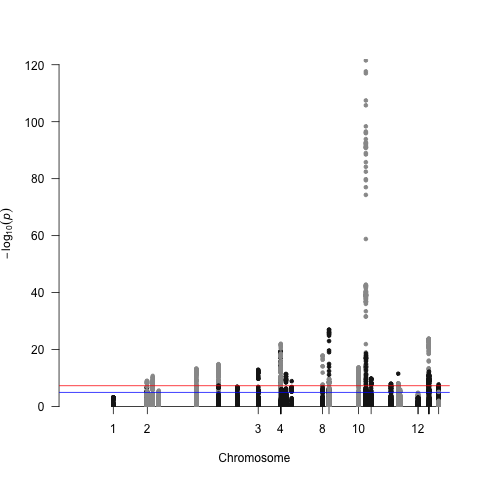

In [30]:
%%R -i df_logistic 

manhattan(df_logistic, chr="CHR", bp="BP", snp="SNP", p="P", chrlabs = c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20))